<a href="https://colab.research.google.com/github/UmbrellaMalware/PythonAnalysisCourse/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализационный анализ данных

Подберите на [kaggle](https://www.kaggle.com/datasets/) или в другом источнике датасет, удовлетворяющий следующим требованиям:
- количество строк - не менее 10 тысяч
- количество столбцов - не менее 10, из которых не менее 30% - числовые

Произведите предобработку данных: обработайте пустые значения, оцените выбросы.
Сформулируйте и докажите (или опровергните) 20 гипотез при помощи визуализаций имеющихся данных. Часть гипотез (но не более 25%) может касаться предобработки данных.

Постарайтесь использовать разные виды диаграмм для визуализации. Обращайте внимание на стиль и грамотность оформления. Все визуализации должны быть выполнены на Python.

Работу рекомендуется выполнять самостоятельно или в группах по 2 человека.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [ ]:
! wget https://www.dropbox.com/s/r1c7jnfolfn372l/all_perth_310121.csv
# dataset from https://www.kaggle.com/syuzai/perth-house-prices

--2021-12-05 08:18:52--  https://www.dropbox.com/s/r1c7jnfolfn372l/all_perth_310121.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r1c7jnfolfn372l/all_perth_310121.csv [following]
--2021-12-05 08:18:52--  https://www.dropbox.com/s/raw/r1c7jnfolfn372l/all_perth_310121.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84dc045716d9397779fc9b26a8.dl.dropboxusercontent.com/cd/0/inline/BbS2JEkKcXF0TMEptGAnx8S09Wt4UaIk9A7jpwISt7PDJTqI6CjqyxmhJTNvpFD1xJ5lTw1l-aSkFhBk5k2mvr6umYyNbrO5c9lkAMmpQJfN4jhV7Y3VHE_Ikm3pYLc19nJdsJ34ojrQIQkUOMytnQIC/file# [following]
--2021-12-05 08:18:52--  https://uc84dc045716d9397779fc9b26a8.dl.dropboxusercontent.com/cd/0/inline/BbS2JEkKcXF0TMEptGAnx8S09Wt4UaIk9A7jpwISt7PDJTqI6CjqyxmhJTNvpFD1xJ

In [ ]:
data = pd.read_csv('all_perth_310121.csv')
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [ ]:
print(f'columns count {len(data.columns)}, rows count {len(data)}')


columns count 19, rows count 33656


In [ ]:
without_null_data = data.dropna()
print(f'columns count {len(without_null_data.columns)}, rows count {len(without_null_data)}')

columns count 19, rows count 19208


1. В районе Dalkeith самые дорогие дома

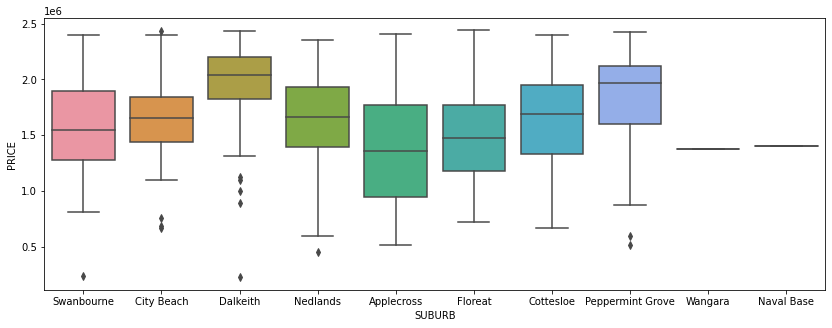

In [ ]:
top_suburb_by_median_price = data.groupby('SUBURB')['PRICE'].median().sort_values(ascending=False)[:10]
fig, axis = plt.subplots(1, figsize=(14, 5))
sns.boxplot(ax=axis, data=data[data['SUBURB'].isin(top_suburb_by_median_price.index)], x="SUBURB", y="PRICE")

2. Более разнообразные размеры участков в районе Gidgegannup

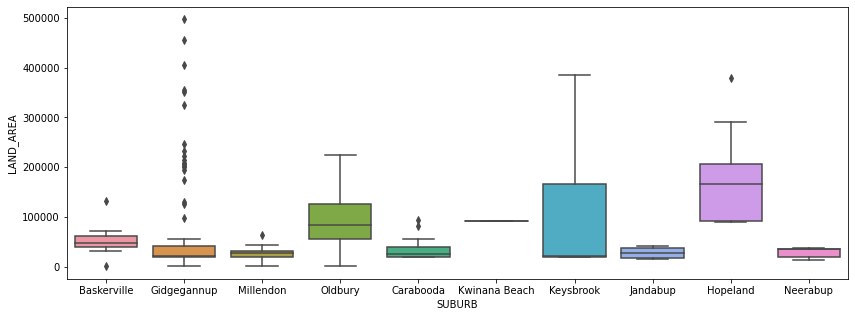

In [ ]:
top_suburb_by_median_land_area = data.groupby('SUBURB')['LAND_AREA'].median().sort_values(ascending=False)[:10]
fig, axis = plt.subplots(1, figsize=(14, 5))
sns.boxplot(ax=axis, data=data[data['SUBURB'].isin(top_suburb_by_median_land_area.index)], x="SUBURB", y="LAND_AREA")

3. Площадь дома сильнее всего влияет на цену дома

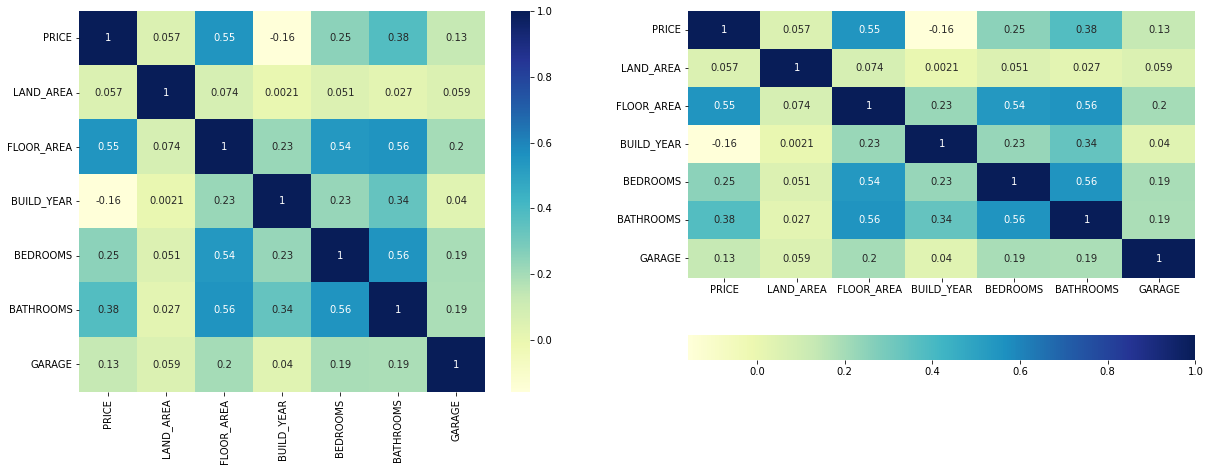

In [ ]:
cor_matrix = data[["PRICE", "LAND_AREA", "FLOOR_AREA",	"BUILD_YEAR", "BEDROOMS",	"BATHROOMS", "GARAGE"]].corr()
fig, axis = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(ax=axis[0], data=cor_matrix, annot=True, cmap="YlGnBu")
sns.heatmap(ax=axis[1], data=cor_matrix, annot=True, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"});

4. Цена на новый фонд домов дешевле

In [ ]:
d = without_null_data.groupby('BUILD_YEAR')['PRICE']
fig = px.line(d.median(), y="PRICE", x=d.median().index, title="График зависимости медианной цены от года постройки", labels={'x':'BUILD YEAR'})
fig.show()


5. Дома из нового фонда покупают чаще

In [ ]:
fig = px.line(d.count(), y="PRICE", x=d.count().index, title="График зависимости кол-во сделок от года постройки", labels={'PRICE':'SOLD', 'x':'BUILD YEAR'})
fig.show()

6. Среднее кол-во комнат во всех районах примерно одинаковое

In [ ]:
d = without_null_data.groupby('SUBURB')['BEDROOMS'].mean()
fig = px.line(d, y="BEDROOMS", x=d.index, title="График зависимости кол-во комнат от района", labels={'x':'SUBURB'})
fig.show()

7. Чаще всего два гаражных места



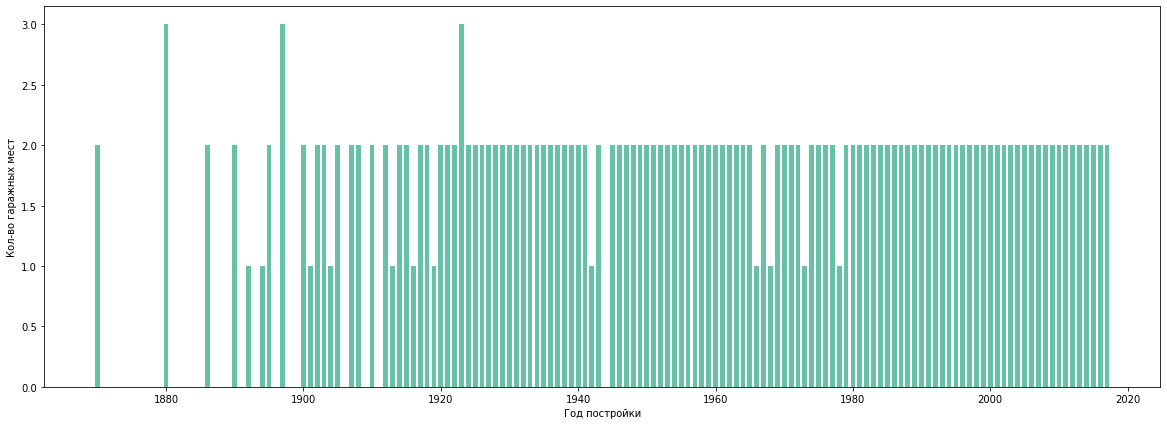

In [ ]:
d = without_null_data.groupby('BUILD_YEAR')['GARAGE'].agg(lambda x:x.value_counts().index[0])
plt.figure(figsize=(20, 7))
plt.bar(x=d.index, height=d.values, width=.7)
plt.ylabel("Кол-во гаражных мест");
plt.xlabel("Год постройки");

8. C 1960 по 1980 предпочитали строить дома с тремя спальнями

9. После 1980 предпочитают строить дома с 4 спальнями

In [ ]:
d = without_null_data.groupby('BUILD_YEAR')['BEDROOMS'].agg(lambda x:x.value_counts().index[0])
fig = px.line(d, y="BEDROOMS", x=d.index, title="График зависимости кол-во комнат от года постройки", labels={'x':'Год постройки'})
fig.show()

Дома рядом 

10. Ипотечный кризис 2008 в США также повлиял на цены в Австралии

In [ ]:
def cast_date(date):
  d = date.replace('\r', '')
  return datetime.datetime.strptime(d, '%m-%Y')

without_null_data['corr_date_sold'] = without_null_data.apply(lambda x: cast_date(x['DATE_SOLD']),axis=1)
d = without_null_data.groupby('corr_date_sold')['PRICE'].median().sort_index()
fig = px.line(d, y="PRICE", x=d.index, title="График цен от года продажи дома", labels={'x':'Год продажи'})
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11. Дороже всего покупать дом рядом с станцией Cottesloe Station

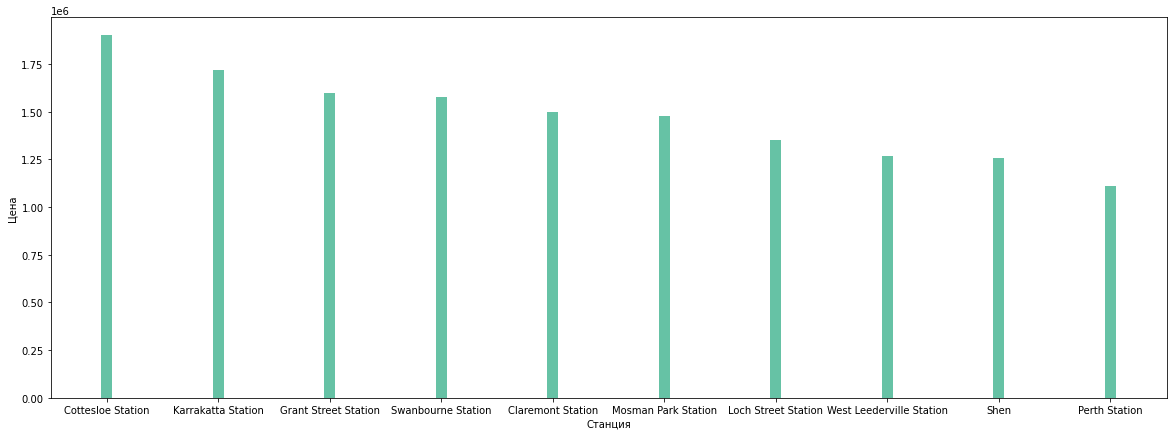

In [ ]:
d = without_null_data.groupby('NEAREST_STN')['PRICE'].median().sort_values(ascending = False)[:10]
plt.figure(figsize=(20, 7))
plt.bar(x=d.index, height=d.values, width=.1)
plt.ylabel("Цена");
plt.xlabel("Станция");

12. Нет района который выделяется кол-вом продаж

In [ ]:
top_suburb = data['SUBURB'].value_counts()
f = top_suburb.apply(lambda row: row/len(data)*100).sort_values(ascending=False)
fig = px.pie(top_suburb, names=f[:10].index, values=f[:10], labels=top_suburb.index)
fig.show()


13. Чем лучше школа рядом, тем дороже дом

In [ ]:
d = without_null_data.groupby('NEAREST_SCH_RANK')['PRICE']
fig = px.line(d.median(), y="PRICE", x=d.median().index, title="График зависимости цены от рейтинга школы", labels={'x':'SCH_RANK'})
fig.show()


14. Расстояние до центра не очень влияет на цену дома

In [ ]:


d = without_null_data.groupby('CBD_DIST')['PRICE']
fig = px.line(d.median(), y="PRICE", x=d.median().index, title="График зависимости цены от расстояния до центра", labels={'x':'DIST'})
fig.show()

15. В последние 40 лет есть тренд на увеличение площади дома

In [ ]:
d = without_null_data.groupby('BUILD_YEAR')['FLOOR_AREA'].median()
fig = px.line(d, y="FLOOR_AREA", x=d.index, title="График зависимости площади от года постройки", labels={'x':'Год постройки'})
fig.show()

16. ellenbrook christian college самая пешедоступная школа

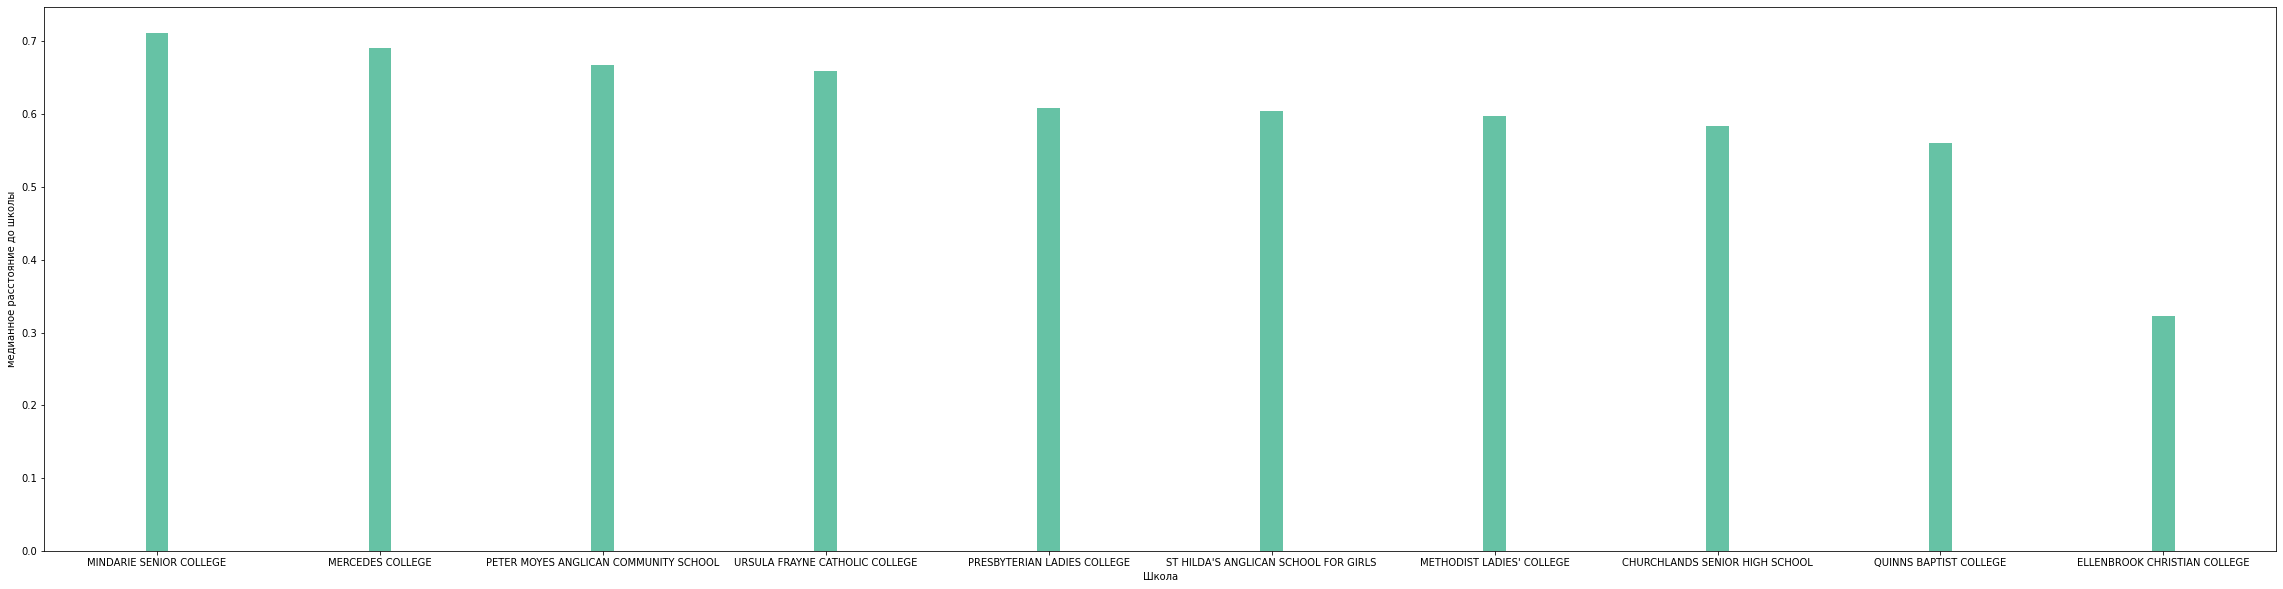

In [ ]:
d = without_null_data.groupby('NEAREST_SCH')['NEAREST_SCH_DIST'].median().sort_values(ascending = False)[-10:]
plt.figure(figsize=(40, 10))
plt.bar(x=d.index, height=d.values, width=.1)
plt.ylabel("медианное расстояние до школы");
plt.xlabel("Школа");

16. Рядом с anglican school for girls самые дорогие дома

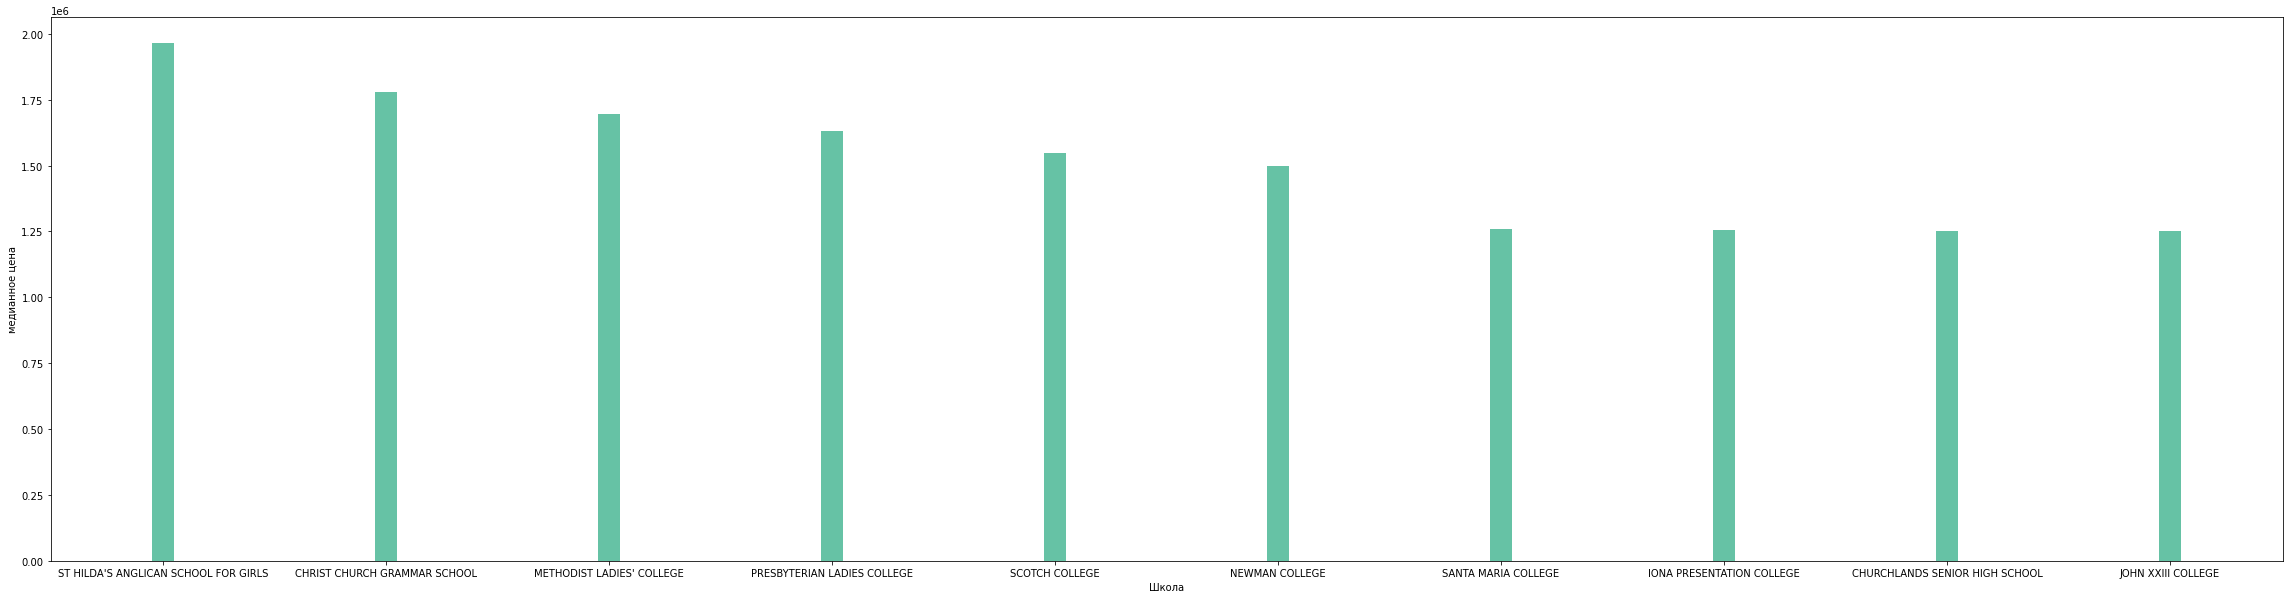

In [ ]:
d = without_null_data.groupby('NEAREST_SCH')['PRICE'].median().sort_values(ascending = False)[:10]
plt.figure(figsize=(40, 10))
plt.bar(x=d.index, height=d.values, width=.1)
plt.ylabel("медианное цена");
plt.xlabel("Школа");

17. Площадь домов сконцентрирована в районе 200
18. Площадь участка больше 1000, не влияет цену
19. У самых дорогих домов суммарная площьа меньше 1500
20. Расположение дома влияет на цену сильнее, чем его площадь

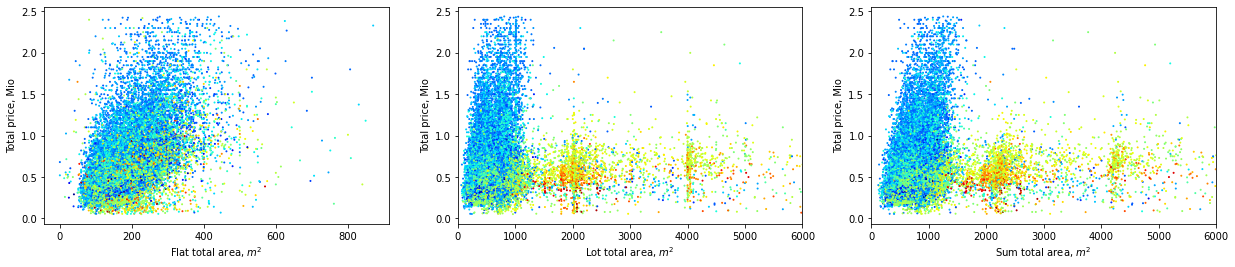

In [ ]:
x1 = data.LAND_AREA
x2 = data.FLOOR_AREA
y = data.PRICE
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(21,4))
scatter = ax1.scatter(x2, y/1000000, s=1, c=data["LONGITUDE"], cmap=plt.get_cmap("jet"))
ax1.set(xlabel = r"Flat total area, $m^2$", ylabel = "Total price, Mio")
scatter = ax2.scatter(x1, y/1000000, s=1,  c=data["LONGITUDE"], cmap=plt.get_cmap("jet"))
ax2.set(xlabel = r"Lot total area, $m^2$", ylabel = "Total price, Mio", xlim=[0,6000])
scatter = ax3.scatter(x1+x2, y/1000000, s=1, c=data["LONGITUDE"], cmap=plt.get_cmap("jet"))
ax3.set(xlabel = r"Sum total area, $m^2$", ylabel = "Total price, Mio", xlim=[0,6000]);